In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [2]:
df = pl.read_csv("./AmazonFoodReviewDataset/Reviews.csv")
df = df.head(1000)
df.shape

(1000, 10)

In [3]:
df.head()

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
i64,str,str,str,i64,i64,i64,i64,str,str
1,"""B001E4KFG0""","""A3SGXH7AUHU8GW""","""delmartian""",1,1,5,1303862400,"""Good Quality Dog Food""","""I have bought several of the V…"
2,"""B00813GRG4""","""A1D87F6ZCVE5NK""","""dll pa""",0,0,1,1346976000,"""Not as Advertised""","""Product arrived labeled as Jum…"
3,"""B000LQOCH0""","""ABXLMWJIXXAIN""","""Natalia Corres ""Natalia Corres…",1,1,4,1219017600,"""""Delight"" says it all""","""This is a confection that has …"
4,"""B000UA0QIQ""","""A395BORC6FGVXV""","""Karl""",3,3,2,1307923200,"""Cough Medicine""","""If you are looking for the sec…"
5,"""B006K2ZZ7K""","""A1UQRSCLF8GW1T""","""Michael D. Bigham ""M. Wassir""""",0,0,5,1350777600,"""Great taffy""","""Great taffy at a great price. …"


### Exploratory Data Analysis

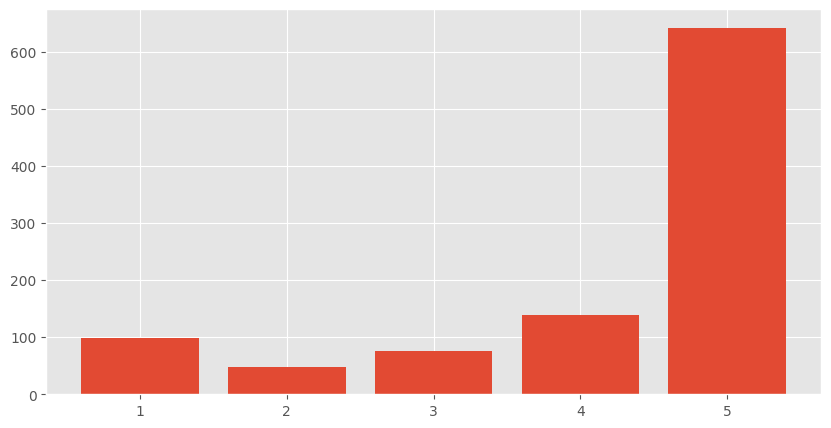

In [4]:
score_count = df['Score'].value_counts().sort(by='Score')
plt.figure(figsize=(10,5))
plt.bar(score_count['Score'], score_count['count'])
plt.show()

### Basic NLTK

In [5]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
tagged_tokens = nltk.pos_tag(tokens)
tagged_tokens[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged_tokens)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### Using VADER for Sentiment analysis
##### We will use NLTK's methods to get the neg/neu or pos score of words

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [10]:
sia = SentimentIntensityAnalyzer()
sia

In [11]:
sia.polarity_scores("I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [12]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [13]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
dict = {"neg": [0.5]}
dict.update({"neg": [0.6]})
dict

{'neg': [0.6]}

In [15]:
#Run the polarity score on all the texts of dataset
res = {
    "neg": [],
    "neu": [],
    "pos": [],
    "compound": []
}
for text in tqdm(df['Text']):
    score_dict = sia.polarity_scores(text)
    res['neg'].append(score_dict['neg'])
    res['neu'].append(score_dict['neu'])
    res['pos'].append(score_dict['pos'])
    res['compound'].append(score_dict['compound'])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
#Convert to dataframe for easier manipuplation

vader = (
    pl.from_dict(res)
    .with_row_index("Id", offset=1)
    .select(pl.col('Id').cast(pl.Int64), pl.all().exclude("Id"))
    .join(df, on='Id', how='left')
)
vader.head(4)

Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
i64,f64,f64,f64,f64,str,str,str,i64,i64,i64,i64,str,str
1,0.0,0.695,0.305,0.9441,"""B001E4KFG0""","""A3SGXH7AUHU8GW""","""delmartian""",1,1,5,1303862400,"""Good Quality Dog Food""","""I have bought several of the V…"
2,0.138,0.862,0.0,-0.5664,"""B00813GRG4""","""A1D87F6ZCVE5NK""","""dll pa""",0,0,1,1346976000,"""Not as Advertised""","""Product arrived labeled as Jum…"
3,0.091,0.754,0.155,0.8265,"""B000LQOCH0""","""ABXLMWJIXXAIN""","""Natalia Corres ""Natalia Corres…",1,1,4,1219017600,"""""Delight"" says it all""","""This is a confection that has …"
4,0.0,1.0,0.0,0.0,"""B000UA0QIQ""","""A395BORC6FGVXV""","""Karl""",3,3,2,1307923200,"""Cough Medicine""","""If you are looking for the sec…"


#### Plotting vader sentiment analysis data

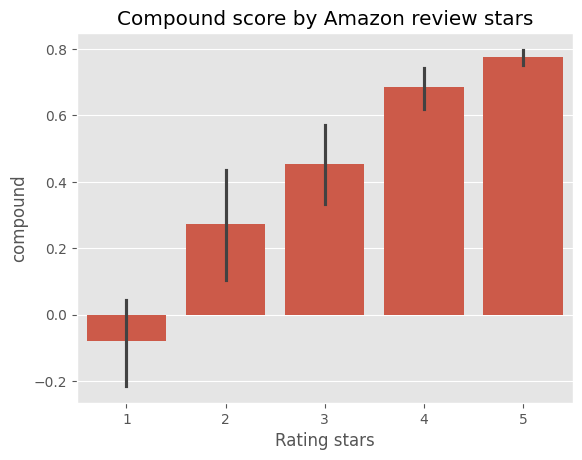

In [17]:
sns.barplot(data=vader, x='Score', y='compound')
plt.title("Compound score by Amazon review stars")
plt.xlabel("Rating stars")
plt.show()

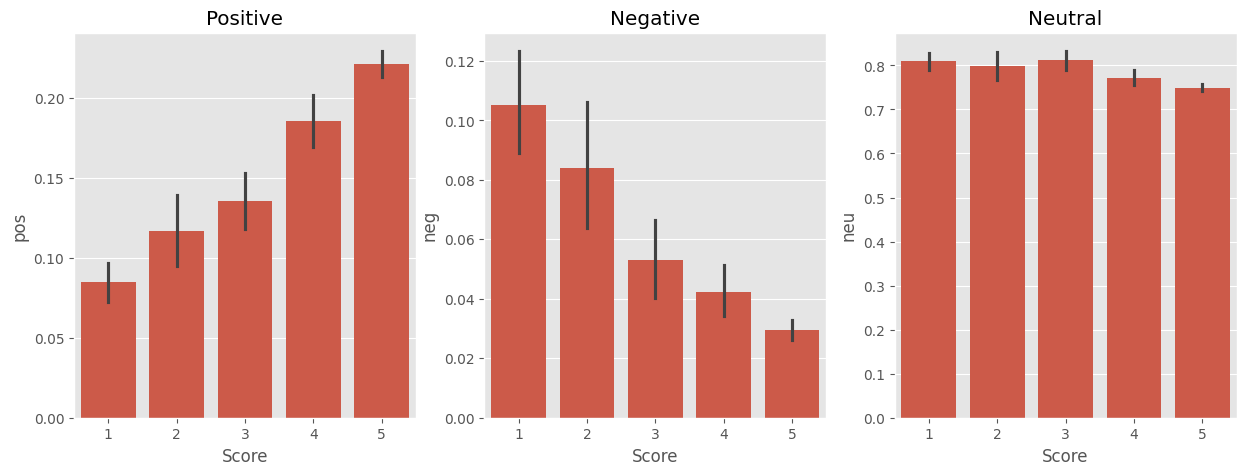

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(data=vader, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vader, x='Score', y='neg', ax=axs[1])
sns.barplot(data=vader, x='Score', y='neu', ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negative")
axs[2].set_title("Neutral")
plt.show()

Looks like VADER sentiment intensity analyser is able to decently provide proper sentiment values for texts in reviews as they are nicely aligned with the star rating. Lower ratings have higher negative sentiment value and vice versa.

### Time for Transformer architecture based Roberta model

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
# Load model directly
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [21]:
#VADER results on a review
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [22]:
#Data cleaning to run on RoBERTa model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687453,
 'roberta_pos': 0.0029573692}

In [23]:
def polarity_scores_roberta(review_text):
    encoded_text = tokenizer(review_text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [24]:
roberta_res = {
    "roberta_neg": [],
    "roberta_neu": [],
    "roberta_pos": []
}
for i, text in enumerate(tqdm(df['Text'])):
    try:
        score_dict = polarity_scores_roberta(text)
        roberta_res['roberta_neg'].append(score_dict['roberta_neg'])
        roberta_res['roberta_neu'].append(score_dict['roberta_neu'])
        roberta_res['roberta_pos'].append(score_dict['roberta_pos'])
    except RuntimeError:
        roberta_res['roberta_neg'].append(0)
        roberta_res['roberta_neu'].append(0)
        roberta_res['roberta_pos'].append(0)
        print(f'Broke for id: {i}')


  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id: 82
Broke for id: 186
Broke for id: 528
Broke for id: 539
Broke for id: 745
Broke for id: 862


In [ ]:
#Filling broken areas/rows as null to make each Id/index be equal to its equivalent in original dataframe. 
broken_indexes = [82,186,528,539,745,862]
for dict in roberta_res:
    for index in broken_indexes:
        roberta_res[dict].insert(index, 0)

In [57]:
roberta_df = (
    pl.from_dict(roberta_res, strict=False).cast(pl.Float64)
    .with_row_index("Id", offset=1)
    .select(pl.col('Id').cast(pl.Int64), pl.all().exclude('Id'))
)
roberta_df

Id,roberta_neg,roberta_neu,roberta_pos
i64,f64,f64,f64
1,0.009624,0.04998,0.940395
2,0.508986,0.452414,0.0386
3,0.003229,0.098067,0.898704
4,0.002295,0.090219,0.907486
5,0.001635,0.010302,0.988063
…,…,…,…
996,0.001335,0.006112,0.992553
997,0.002649,0.016077,0.981274
998,0.001362,0.011372,0.987266


### Comparing models

In [52]:
vader.columns

['Id',
 'neg',
 'neu',
 'pos',
 'compound',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

In [60]:
result_df = vader.join(roberta_df, on='Id', how='left')
result_df.head()

Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,roberta_neg,roberta_neu,roberta_pos
i64,f64,f64,f64,f64,str,str,str,i64,i64,i64,i64,str,str,f64,f64,f64
1,0.0,0.695,0.305,0.9441,"""B001E4KFG0""","""A3SGXH7AUHU8GW""","""delmartian""",1,1,5,1303862400,"""Good Quality Dog Food""","""I have bought several of the V…",0.009624,0.04998,0.940395
2,0.138,0.862,0.0,-0.5664,"""B00813GRG4""","""A1D87F6ZCVE5NK""","""dll pa""",0,0,1,1346976000,"""Not as Advertised""","""Product arrived labeled as Jum…",0.508986,0.452414,0.0386
3,0.091,0.754,0.155,0.8265,"""B000LQOCH0""","""ABXLMWJIXXAIN""","""Natalia Corres ""Natalia Corres…",1,1,4,1219017600,"""""Delight"" says it all""","""This is a confection that has …",0.003229,0.098067,0.898704
4,0.0,1.0,0.0,0.0,"""B000UA0QIQ""","""A395BORC6FGVXV""","""Karl""",3,3,2,1307923200,"""Cough Medicine""","""If you are looking for the sec…",0.002295,0.090219,0.907486
5,0.0,0.552,0.448,0.9468,"""B006K2ZZ7K""","""A1UQRSCLF8GW1T""","""Michael D. Bigham ""M. Wassir""""",0,0,5,1350777600,"""Great taffy""","""Great taffy at a great price. …",0.001635,0.010302,0.988063


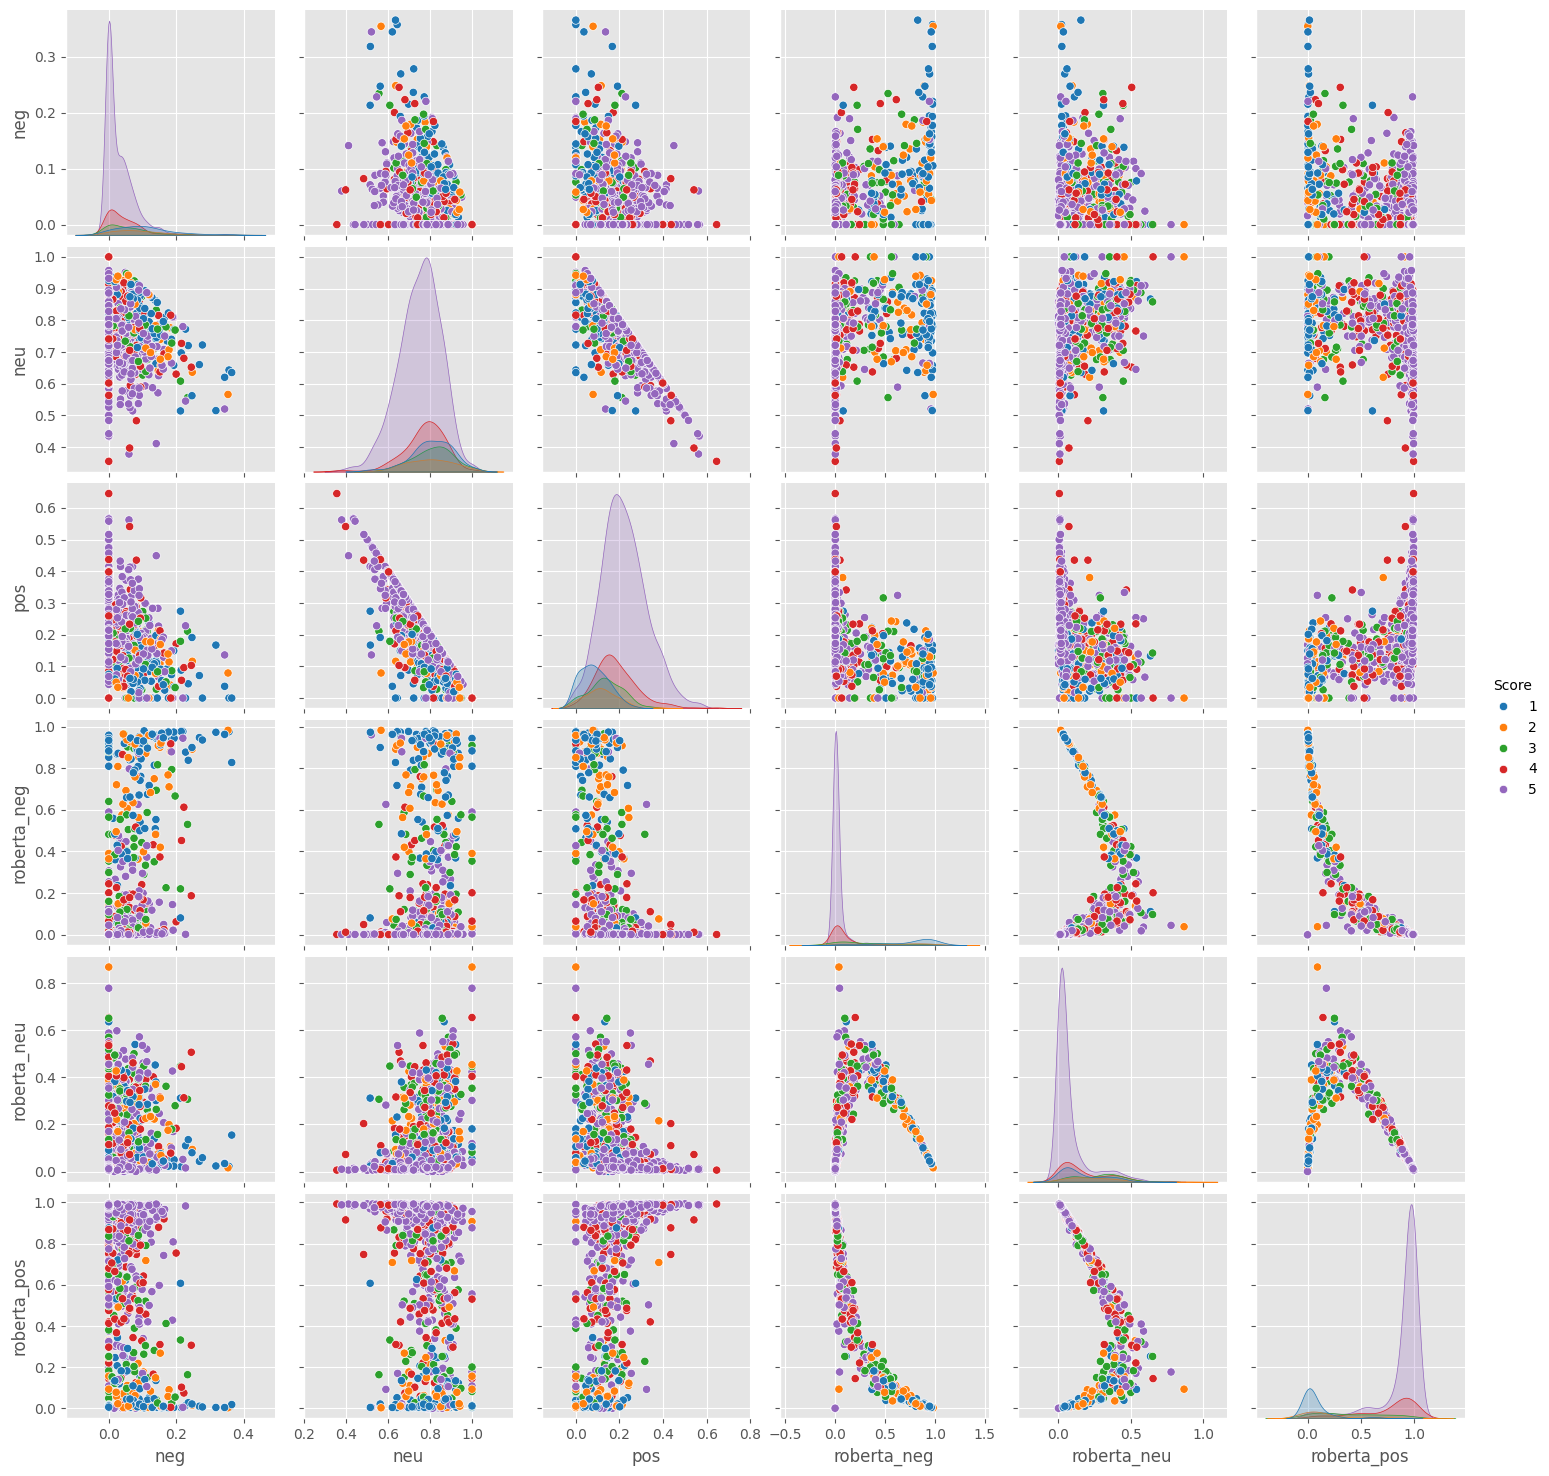

In [63]:
sns.pairplot(data=result_df.to_pandas(), vars=['neg', 'neu', 'pos',
                               'roberta_neg','roberta_neu','roberta_pos'],
                               hue='Score',
                               palette='tab10')
plt.show()

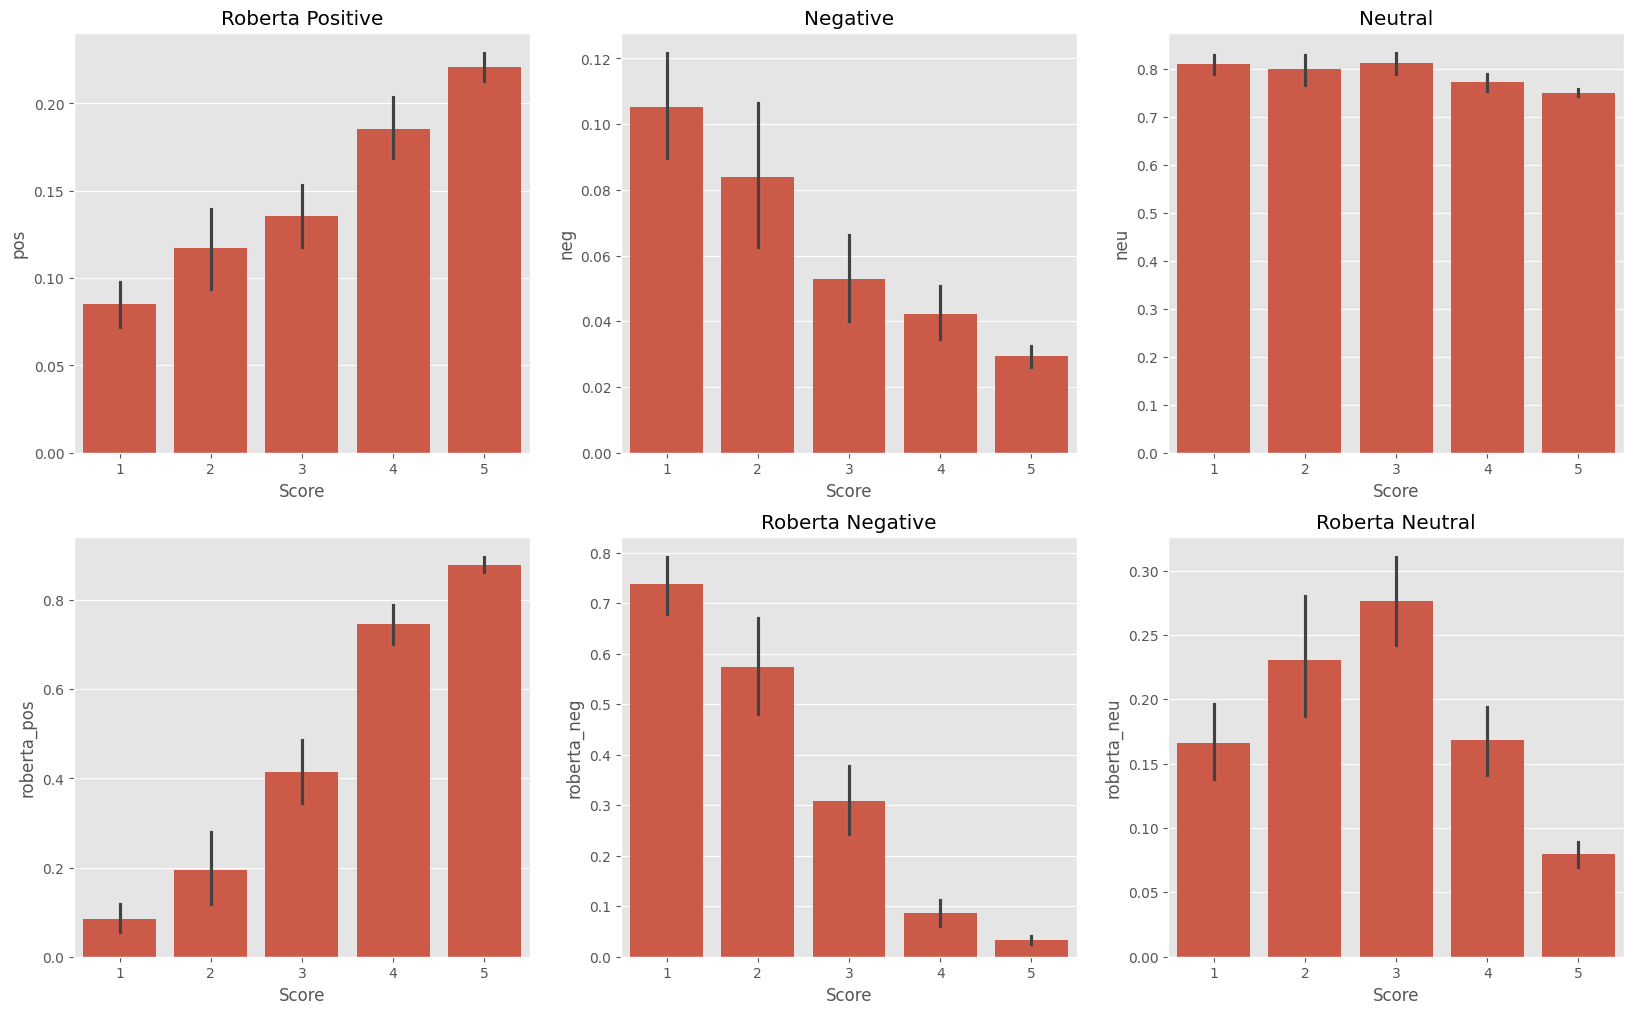

In [76]:
fig, axs = plt.subplots(ncols=3,nrows=2, figsize=(20,12))
sns.barplot(data=result_df, x='Score', y='pos', ax=axs[0,0])
sns.barplot(data=result_df, x='Score', y='neg', ax=axs[0,1])
sns.barplot(data=result_df, x='Score', y='neu', ax=axs[0,2])
sns.barplot(data=result_df, x='Score', y='roberta_pos', ax=axs[1,0])
sns.barplot(data=result_df, x='Score', y='roberta_neg', ax=axs[1,1])
sns.barplot(data=result_df, x='Score', y='roberta_neu', ax=axs[1,2])
axs[0,0].set_title("Positive")
axs[0,1].set_title("Negative")
axs[0,2].set_title("Neutral")
axs[0,0].set_title("Roberta Positive")
axs[1,1].set_title("Roberta Negative")
axs[1,2].set_title("Roberta Neutral")
plt.show()

We can see here that RoBERTa model is much better at sentiment analysis, giving highly proportionate or correlated values based on the rating. For example, Roberta Negative has around 0.75 val for 1star while VADER neg has only 0.10 val for 1 star ratings.

### Review Examples:

In [82]:
result_df.filter(pl.col('Score') == 1).sort(by='roberta_pos', descending=True)['Text'][0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [89]:
result_df.filter(pl.col('Score') == 1).sort(by='pos', descending=True)['Text'][0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [96]:
#negative sentiment on 5* reviews
result_df.filter(pl.col('Score') == 5).sort(by='roberta_neg', descending=True)['Text'][0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [97]:
result_df.filter(pl.col('Score') == 5).sort(by='neg', descending=True)['Text'][0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'